# Model Evaluation Exercise

## Regression evaluation

In [ ]:
# NOTE neglegable differences as only 1000 data points - not really enough 

In [32]:
# import numpy
import numpy as np

In [53]:
# This is getting the dataset
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)


# np.unique(y)

(1000, 10)
(1000,)


In [40]:
from sklearn.model_selection import train_test_split

random_seed = 88
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_seed)

# NOTE stratify y only for classification


In [41]:
from sklearn.linear_model import LinearRegression, Ridge

In [42]:
# creating linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [43]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X_train,y_train)
y_rr = rr.predict(X_test)

In [44]:
X.shape

(1000, 10)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers too....*
the average of the squared difference between the target value and the value predicted by the regression model. 

It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.
https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914

MSE = 1/n * sum((y_true - y_pred)**2)



* import **mean_absolute_error** from sklearn

In [45]:
from sklearn.metrics import mean_squared_error

* compute MAE

In [46]:
# linear regression y_lr
# ridge regression y_rr
# true y y

MSE_lr = mean_squared_error(y_test,y_lr) 
MSE_rr = mean_squared_error(y_test,y_rr) 
print("MSE_lr", MSE_lr)
print("MSE_rr", MSE_rr)

MSE_lr 114.75356455212568
MSE_rr 114.71089180207636


* According to MAE, what is the better model?

In [12]:
# linear regression is ever so slighly better?

____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers too....how much the relationship in data can be explained by model
* It represents the proportion of variance (of y) that has been explained by the independent variables in the model.

R_squared = 1 - (MSE(model)/MSE(baseline))

* import **r2_score** from sklearn

In [47]:
from sklearn.metrics import r2_score

* compute R2

In [48]:
r2_lr = r2_score(y_test, y_lr)
r2_rr = r2_score(y_test, y_rr)
print('r2_lr', r2_lr)
print('r2_rr', r2_rr)

r2_lr 0.9971976009485212
r2_rr 0.9971986430605874


* According to R2, what is the better model?

In [15]:
# neither

* (Stretch) use predictions from linear regression and compute adjusted R2

In [49]:
# Adjusted_R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
# Adjusted_R2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R2_lr = 1 - (1-r2_lr)*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R2_rr = 1 - (1-r2_rr)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(Adjusted_R2_lr)
print(Adjusted_R2_rr)

0.9971692652654931
0.9971703179145872


________________________________
## Classification evaluation

In [97]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

random_seed = 88
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_seed)


(1000, 10)
(1000,)


In [17]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [98]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [99]:
# creating linear regression
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)
y_lr = clf_lr.predict(X_test)


In [100]:
# creating ridge regression
clf_rc = RidgeClassifier(alpha=0.1)
clf_rc.fit(X_train,y_train)
y_rc = clf_rc.predict(X_test)


In [101]:
pre_score_lr = precision_score(y_test, y_lr, average='micro')
pre_score_rc = precision_score(y_test, y_rc, average='micro')

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers too....Precision gives the fraction of correctly identified as positive out of all predicted as positives.

Precision = TP/ (TP + FP)  (True Positive / total predicted as positive)

* import **precision_score** from sklearn

 FROM SKLEARN
* 'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

* 'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* 'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* 'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [102]:
from sklearn.metrics import precision_score
# NOTE from sklearn:
# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.


* compute precision

In [103]:
### WHICH AVERAGE SHOULD I BE USING IN THIS CASE?

pre_score_lr = precision_score(y_test, y_lr, average='micro')
pre_score_rc = precision_score(y_test, y_rc, average='micro')

* print precision

In [104]:
print('pre_score_lr', pre_score_lr)
print('pre_score_rr', pre_score_rr)

pre_score_lr 0.91
pre_score_rr 0.876


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers to....Sensitivity or True positive rate (want for cancer test - prefer FP to FN(

Recall = TP / (TP + FN)  (true positive / all positive) (TPR - true positive rate)

* import **recal_score** from sklearn

In [94]:
from sklearn.metrics import recall_score

* compute recall

In [106]:
# WHICH AVERERAGE SHOULD BE USED MACRO< MICRO OR weighted
# TRY THEM ALL

recall_lr = recall_score(y_test, y_lr, average='macro')
recall_rc = recall_score(y_test, y_rc, average='macro')

recall_lr = recall_score(y_test, y_lr, average='micro')
recall_rc = recall_score(y_test, y_rc, average='micro')

recall_lr = recall_score(y_test, y_lr, average='binary')
recall_rc = recall_score(y_test, y_rc, average='binary')

* print recall

In [107]:
print('recall_lr', recall_lr)
print('recall_rc', recall_rc)

recall_lr 0.8981481481481481
recall_rc 0.8796296296296297


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers to....plots out the sensitivity and specificity for every possible decision rule cutoff between 0 and 1 for a model.

(my notes) Want the steepest point (low FPR, high TPR)

In [141]:
# # SUGGESTED READING 
# # https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
# # plot_roc_curve(clf, X_test, y_test)
# # plot_roc_curve(lr, X, y) # NOTE DEPRECIATED



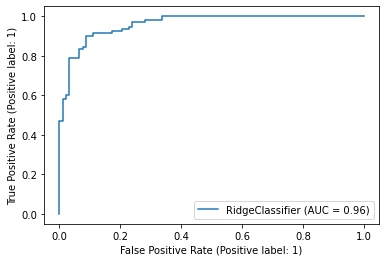

In [139]:
# FROM ESTIMATES

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_rc, X_test, y_test)

plt.show()

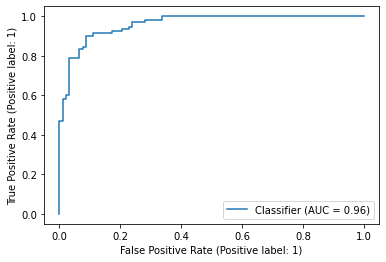

In [143]:
# FROM PREDICTIONS
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

y_pred = clf_rc.decision_function(X_test)
RocCurveDisplay.from_predictions(
    y_test, y_pred)

plt.show()

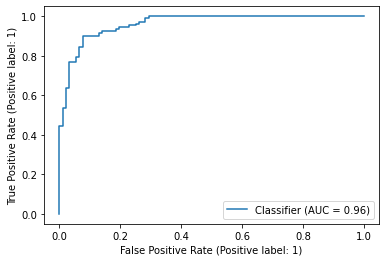

In [144]:
# FOR LOG REG
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

y_pred = clf_lr.decision_function(X_test)
RocCurveDisplay.from_predictions(
    y_test, y_pred)

plt.show()

In [158]:
# from sklearn import metrics
# import numpy as np
# import matplotlib.pyplot as plt

# y_true = # true labels
# y_probas = # predicted results
# fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# # Print ROC curve
# plt.plot(fpr,tpr)
# plt.show() 

# # Print AUC
# auc = np.trapz(tpr,fpr)
# print('AUC:', auc)

* import **roc_curve** from sklearn

In [156]:
from sklearn.metrics import roc_curve, plot_roc_curve



* compute and store ROC curve values in fpr, tpr, thresholds variables

In [152]:
y_scores = clf_lr.predict_proba(X_test)
print(y_scores.shape)
# print(scores[:,-1])

(200, 2)


In [155]:
# #####THIS DOESN"T WORK AS SCORES SHAPE @ DIMENSIONS WHICH PARAMETER DO I CHOOSE?  # one is y and other is the parameter
from sklearn.metrics import roc_auc_score

y_proba = y_scores[:,-1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,-1], pos_label=1)

# compute AUC-score
auc = roc_auc_score(y_test,y_scores[:,-1])

# print AUC-score
print(auc)
# print(fpr)
# print(tpr)
# print(thresholds)

0.961755233494364


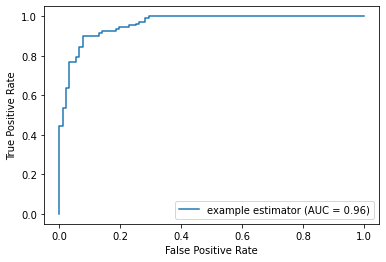

In [157]:
import matplotlib.pyplot as plt
from sklearn import metrics

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_rc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.show()
# print('false positive rate', fpr)

* import matplotlib 

* plot ROC

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

* used in multinomial logistic regression and neural networks
* aka logistic loss or cross-entropy loss

* loss function for logistic regression



* import **log_loss** from sklearn

In [42]:
from sklearn.metrics import log_loss

* compute log_loss

In [164]:
# The cost function used in Logistic Regression is Log Loss. Not MSE  (always btwn 0-1 hard to keeep track of errors)
# Log Loss is the negative average of the log of corrected predicted probabilities for each instance.

from sklearn.metrics import log_loss

ll = log_loss(y_test, y_lr)
# loss_values = clf_lr.estimator.loss_curve_

# https://scikit-learn.org/stable/modules/model_evaluation.html  ** look at this

* print log_loss

In [160]:
print(ll)
# true label  vs predicted

3.1085178614520186


#### Q: According to metrics above, which one is the better model?

In [ ]:
# They are so very close! But logistic regression is ever so slightly better inthe classifications